<a href="https://colab.research.google.com/github/satkar605/association-rules/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [6]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the neccessary libraries

In [13]:
df = pd.read_csv('/content/drive/MyDrive/dsci-519-py-data/data/BankSegment.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = df.drop(columns=categorical_cols)

df_encoded = pd.concat([df_encoded, encoded_categorical_df], axis=1)

datalist = df_encoded.values

## Setup K-Means

In [20]:
# Third step: set parameter K for the K-Means Algorithm and perform clustering and t-SNE embedding

# Define a list of values for K (number of clusters) to try
K = [4, 6, 10]

# Initialize t-SNE for dimensionality reduction to 2 components for visualization
# init='pca' initializes the embedding with PCA, which is often recommended
# random_state=0 ensures reproducibility of the t-SNE results
tsne = TSNE(n_components=2, init='pca', random_state=0)
# Fit and transform the processed data (datalist) using t-SNE to get a 2D embedding
embed = tsne.fit_transform(datalist)

# Initialize an empty dictionary to store the cluster labels for each value of K
result = {}
# Initialize a dictionary to store the trained KMeans models for each value of K
kmeans_models = {}

# Loop through each value of K defined in the list
for k in K:
    # K-Means Algorithm: Initialize and train the KMeans model
    # n_clusters=k sets the number of clusters for the current iteration
    # random_state=0 ensures reproducibility of the KMeans results
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) # Added n_init=10 for clarity and best practice
    kmeans.fit(datalist)

    # Record the cluster labels for each sample for the current K
    # Update the 'result' dictionary with the cluster labels
    result[k] = kmeans.labels_

    # Store the trained KMeans model for this K value
    kmeans_models[k] = kmeans

# The cluster centers and sample

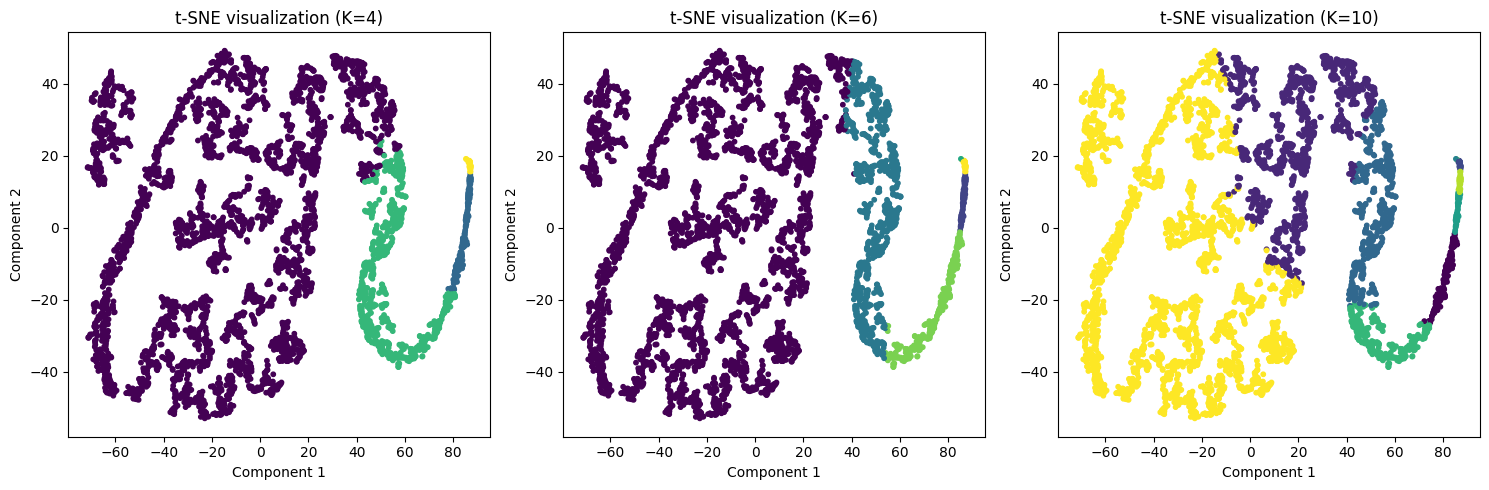

In [16]:
# Optionally, visualize t-SNE results with cluster assignments for each K
plt.figure(figsize=(15, 5))
for i, k in enumerate(K, 1):
    plt.subplot(1, len(K), i)
    plt.scatter(embed[:, 0], embed[:, 1], c=result[k], cmap='viridis', s=10)
    plt.title(f't-SNE visualization (K={k})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.tight_layout()
plt.show()

## Evaluate models

In [21]:
# Evaluate Clustering Performance with Silhouette Score

# Evaluate silhouette scores for each K in the results dictionary
silhouette_avg_k4 = silhouette_score(datalist, result[4])
print(f"Silhouette Score for k=4: {silhouette_avg_k4:.4f}")

silhouette_avg_k6 = silhouette_score(datalist, result[6])
print(f"Silhouette Score for k=6: {silhouette_avg_k6:.4f}")

silhouette_avg_k10 = silhouette_score(datalist, result[10])
print(f"Silhouette Score for k=10: {silhouette_avg_k10:.4f}")

# Optional: loop-based version for cleaner output
for k in [4, 6, 10]:
    silhouette_avg = silhouette_score(datalist, result[k])
    print(f"k={k} → Silhouette Score: {silhouette_avg:.4f}")



Silhouette Score for k=4: 0.7081
Silhouette Score for k=6: 0.6500
Silhouette Score for k=10: 0.5009
k=4 → Silhouette Score: 0.7081
k=6 → Silhouette Score: 0.6500
k=10 → Silhouette Score: 0.5009


## Save the results


In [24]:
# --- Save clustering results and model summary (simplified & correct path) ---
cluster_labels_df = pd.DataFrame({f'k{k}_label': result[k] for k in K})
cluster_labels_df.to_csv('/content/drive/MyDrive/dsci-519-py-data/data/cluster_labels.csv', index=False)

pd.DataFrame({k: [kmeans_models[k].inertia_, silhouette_score(datalist, result[k])] for k in K},
             index=['Inertia', 'Silhouette']).to_csv('/content/drive/MyDrive/dsci-519-py-data/data/model_summary.csv')


## Visualize the Results


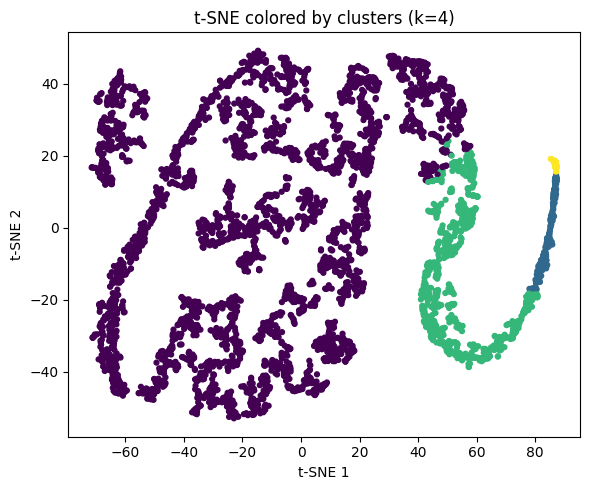

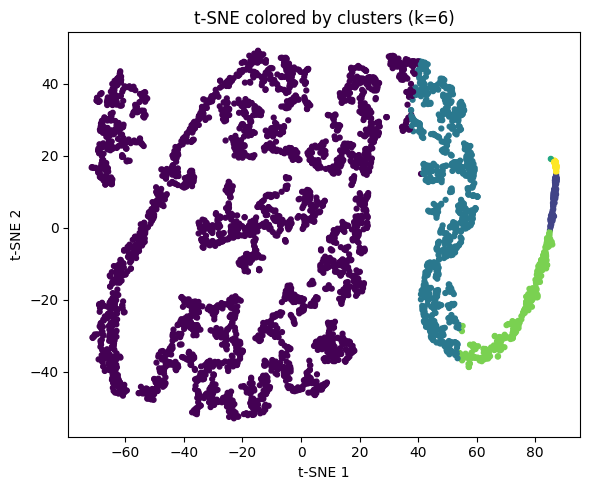

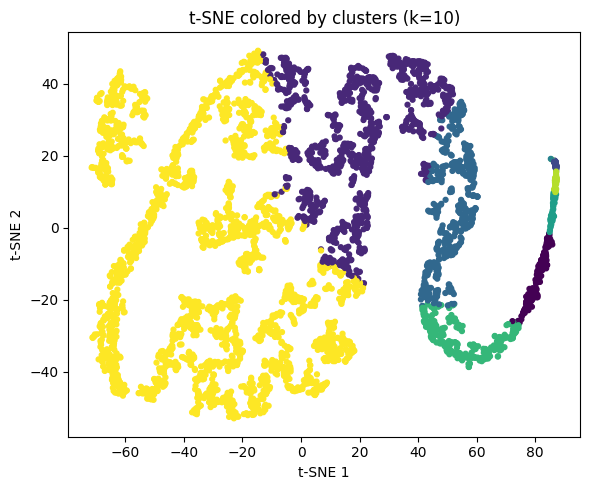

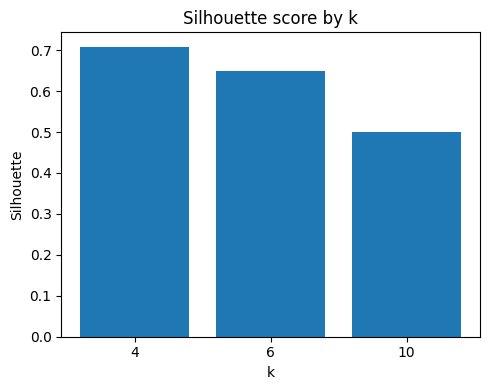

In [25]:
# --- Visualize clusters on t-SNE and compare silhouette scores ---

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 1) t-SNE scatter colored by cluster labels for each k
for k in K:
    plt.figure(figsize=(6,5))
    plt.scatter(embed[:, 0], embed[:, 1], c=result[k], s=12)
    plt.title(f"t-SNE colored by clusters (k={k})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
    plt.tight_layout(); plt.show()

# 2) Bar chart of silhouette scores by k
sils = [silhouette_score(datalist, result[k]) for k in K]
plt.figure(figsize=(5,4))
plt.bar([str(k) for k in K], sils)
plt.title("Silhouette score by k")
plt.xlabel("k"); plt.ylabel("Silhouette")
plt.tight_layout(); plt.show()


## Display cluster results

In [26]:
import pandas as pd
from IPython.display import display

# if you haven't set this yet:
feature_names = datalist.columns if isinstance(datalist, pd.DataFrame) else [f'Feature_{i}' for i in range(datalist.shape[1])]

for k in [4, 6, 10]:
    print(f"\nCluster Centers for k={k}:")
    centers_df = pd.DataFrame(kmeans_models[k].cluster_centers_, columns=feature_names)
    display(centers_df.round(4))           # nice formatting
    print(f"{centers_df.shape[0]} rows x {centers_df.shape[1]} columns")



Cluster Centers for k=4:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53
0,40.7503,0.6150,2.0574,0.0207,442.4465,0.5788,0.1644,15.8492,263.1043,2.7985,...,0.0033,0.0501,0.0357,0.1723,0.1103,0.0098,0.3253,0.0664,0.0161,0.0103
1,43.3800,0.6333,2.1867,0.0000,10670.0133,0.5000,0.0467,16.2333,236.1400,2.9400,...,0.0267,0.0333,0.0133,0.0467,0.1600,0.0133,0.2200,0.2267,0.0200,0.0133
2,42.7822,0.6326,2.0800,0.0000,3851.9896,0.5126,0.1141,16.3185,277.9141,2.7511,...,0.0059,0.0474,0.0222,0.0948,0.1422,0.0163,0.2459,0.1600,0.0252,0.0178
3,46.4783,0.6957,2.2174,0.0000,26353.6957,0.5217,0.1304,12.5652,172.7826,2.3043,...,-0.0000,0.0435,0.0000,0.0870,0.2609,0.0000,0.1739,0.1304,0.0435,0.0000


4 rows x 54 columns

Cluster Centers for k=6:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53
0,40.6254,0.6139,2.0546,0.0223,337.1533,0.5802,0.1674,15.8573,263.1268,2.8218,...,0.0032,0.0479,0.0364,0.1776,0.1051,0.0091,0.3315,0.0608,0.0150,0.0106
1,43.1714,0.6000,2.2429,0.0000,13280.2429,0.4429,0.0429,16.8000,213.3857,2.8857,...,0.0429,-0.0000,0.0143,0.0429,0.1857,0.0000,0.2429,0.2000,0.0429,0.0286
2,42.5805,0.6332,2.0858,0.0000,2681.8931,0.5317,0.1187,16.1306,277.6425,2.6385,...,0.0066,0.0580,0.0237,0.1029,0.1570,0.0106,0.2454,0.1412,0.0277,0.0158
3,60.0000,1.0000,1.0000,0.0000,71188.0000,0.0000,0.0000,6.0000,205.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
4,43.1553,0.6364,2.0947,0.0000,6495.7008,0.5189,0.0947,16.1023,256.7992,2.8939,...,0.0038,0.0530,0.0189,0.0682,0.1326,0.0379,0.2348,0.2197,0.0152,0.0076
5,45.8636,0.6818,2.2727,0.0000,24315.7727,0.5455,0.1364,12.8636,171.3182,2.3636,...,-0.0000,0.0455,0.0000,0.0909,0.2727,0.0000,0.1818,0.1364,-0.0000,0.0000


6 rows x 54 columns

Cluster Centers for k=10:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53
0,43.5118,0.6142,2.1575,0.0000,7764.7795,0.4724,0.0472,16.3307,257.0945,2.7953,...,0.0079,0.0630,0.0236,0.0551,0.1260,0.0394,0.1811,0.2520,0.0079,-0.0000
1,41.2686,0.6147,2.0927,0.0019,1082.5373,0.5966,0.1205,15.6033,293.8088,2.5373,...,0.0086,0.0660,0.0382,0.1205,0.1377,0.0115,0.2954,0.0784,0.0172,0.0115
2,45.5000,0.6667,2.1667,0.0000,24154.4444,0.5556,0.1111,12.8333,160.6111,2.5556,...,-0.0000,0.0556,0.0000,0.1111,0.3333,0.0000,0.2222,0.0556,-0.0000,0.0000
3,42.4048,0.6280,2.0810,0.0000,2655.5470,0.5230,0.1225,16.0350,283.4376,2.7309,...,0.0044,0.0547,0.0219,0.1116,0.1554,0.0088,0.2341,0.1488,0.0197,0.0219
4,60.0000,1.0000,1.0000,0.0000,71188.0000,0.0000,0.0000,6.0000,205.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
5,40.7391,0.5000,2.2174,0.0000,11852.0870,0.4783,0.0435,15.7826,194.4783,2.7391,...,0.0435,0.0000,-0.0000,0.0435,0.2174,0.0000,0.2174,0.2174,0.0217,0.0217
6,43.3708,0.6667,2.0412,0.0000,4698.6704,0.5356,0.1236,16.4494,268.8502,2.8015,...,0.0075,0.0337,0.0225,0.0936,0.1348,0.0225,0.2659,0.1760,0.0300,0.0112
7,42.0000,1.0000,3.0000,0.0000,42045.0000,0.0000,0.0000,8.0000,205.0000,2.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,47.5000,0.7500,2.3571,0.0000,16156.9286,0.4286,0.0714,18.3571,242.5714,3.0357,...,0.0357,0.0000,0.0357,0.0357,0.1071,0.0000,0.2500,0.2500,0.0714,0.0357
9,40.4557,0.6138,2.0435,0.0292,118.4356,0.5727,0.1834,15.9498,250.2138,2.9111,...,0.0012,0.0435,0.0348,0.1945,0.0968,0.0087,0.3427,0.0561,0.0158,0.0099


10 rows x 54 columns


In [30]:
# Recreate the cluster center DataFrames for k=4, k=6, k=10 (if not already done)
import pandas as pd

feature_names = datalist.columns if isinstance(datalist, pd.DataFrame) else [f'Feature_{i}' for i in range(datalist.shape[1])]

cluster_centers_k4 = pd.DataFrame(kmeans_models[4].cluster_centers_, columns=feature_names)
cluster_centers_k6 = pd.DataFrame(kmeans_models[6].cluster_centers_, columns=feature_names)
cluster_centers_k10 = pd.DataFrame(kmeans_models[10].cluster_centers_, columns=feature_names)


## Compare features

In [31]:
# --- Compare One-Hot Encoded Features Between Two Clusters ---
def compare_onehot_features(cluster_centers_df, cluster_a, cluster_b):
    print(f"\nComparison of One-Hot Encoded Features: Cluster {cluster_a} vs Cluster {cluster_b}")

    # Select cluster centers
    cA = cluster_centers_df.iloc[cluster_a]
    cB = cluster_centers_df.iloc[cluster_b]

    # Identify one-hot encoded columns (contain underscore)
    one_hot_cols = [col for col in cluster_centers_df.columns if '_' in col]

    # Header
    print(f"{'Feature':<30} | {'Cluster '+str(cluster_a):<15} | {'Cluster '+str(cluster_b):<15}")
    print("-" * 65)

    # Compare feature averages
    for col in one_hot_cols:
        print(f"{col:<30} | {cA[col]:<15.4f} | {cB[col]:<15.4f}")

# Example usage: compare Cluster 0 vs Cluster 3 for k=4
compare_onehot_features(cluster_centers_k4, 0, 3)



Comparison of One-Hot Encoded Features: Cluster 0 vs Cluster 3
Feature                        | Cluster 0       | Cluster 3      
-----------------------------------------------------------------
Feature_0                      | 40.7503         | 46.4783        
Feature_1                      | 0.6150          | 0.6957         
Feature_2                      | 2.0574          | 2.2174         
Feature_3                      | 0.0207          | 0.0000         
Feature_4                      | 442.4465        | 26353.6957     
Feature_5                      | 0.5788          | 0.5217         
Feature_6                      | 0.1644          | 0.1304         
Feature_7                      | 15.8492         | 12.5652        
Feature_8                      | 263.1043        | 172.7826       
Feature_9                      | 2.7985          | 2.3043         
Feature_10                     | 40.1737         | 53.1304        
Feature_11                     | 0.5306          | 0.5652         

## Visualize clusters with t-SNE

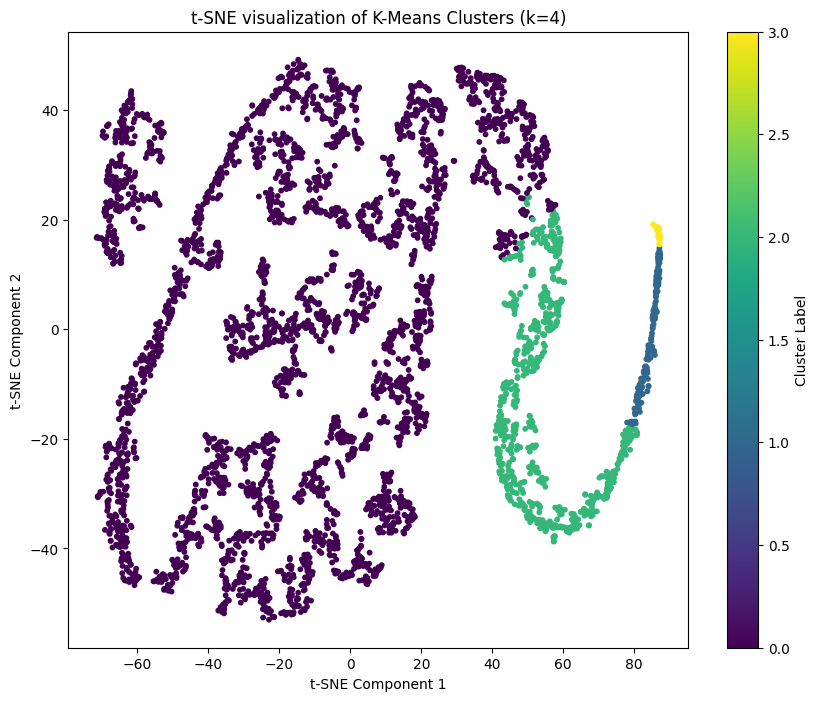

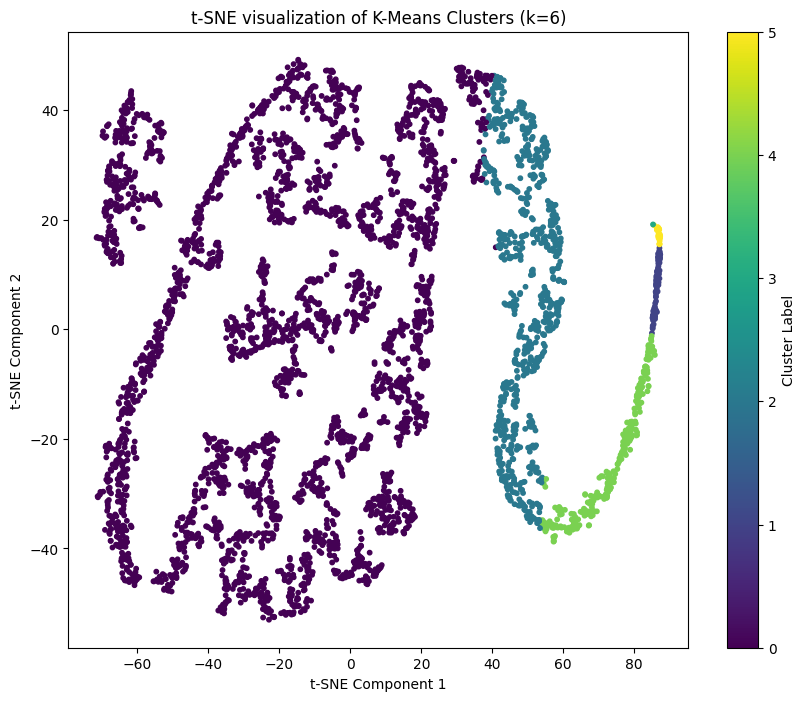

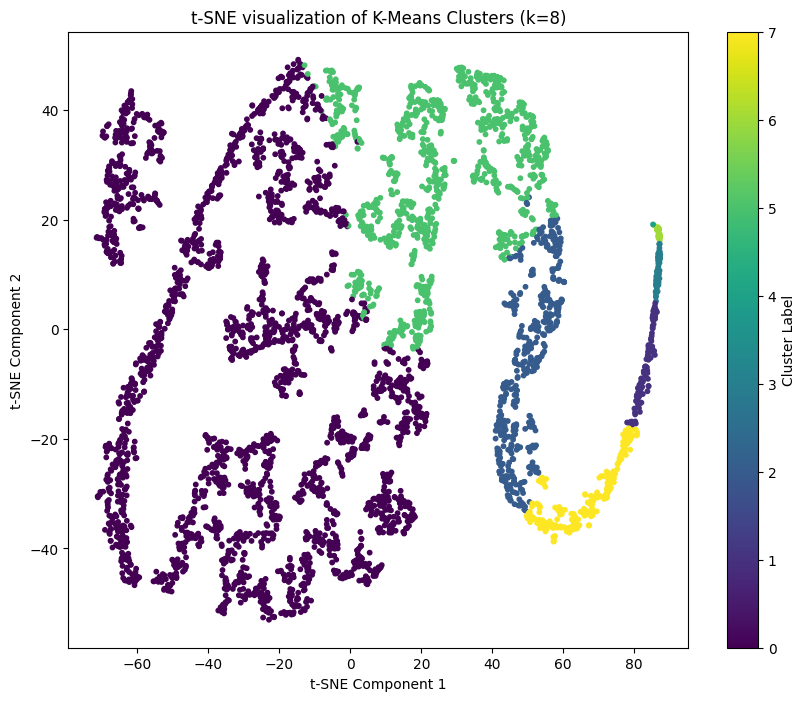

In [32]:
# --- Ensure k=8 exists in your results/models ---
if 8 not in kmeans_models:
    km8 = KMeans(n_clusters=8, random_state=0, n_init=10).fit(datalist)
    kmeans_models[8] = km8
    result[8] = km8.labels_

# --- Plot t-SNE colored by cluster labels for k=4,6,8 ---
import matplotlib.pyplot as plt

for k in [4, 6, 8]:
    plt.figure(figsize=(10, 8))
    plt.scatter(embed[:, 0], embed[:, 1], c=result[k], cmap='viridis', s=10)
    plt.title(f"t-SNE visualization of K-Means Clusters (k={k})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()
